In [1]:
from qiskit import QuantumCircuit, Aer, assemble
from math import pi
import numpy as np
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex


In [3]:
# what if the secong qubit is also in the superposition

qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)

simulator = Aer.get_backend('aer_simulator')
qc.save_statevector()

qobj = assemble(qc)
final_statevector = simulator.run(qobj).result().get_statevector()


In [4]:
final_statevector

array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j])

In [7]:
display(array_to_latex(final_statevector, prefix="\\text{Statevector} = "))


<IPython.core.display.Latex object>

In [11]:
# opposite phase 
qc = QuantumCircuit(2)
qc.h(0)
qc.x(1)
qc.h(1)
qc.cx(0,1)
qc.draw()
qc1 = qc.copy()
qc1.save_statevector()
final_state = simulator.run(qc1).result().get_statevector()
display(array_to_latex(final_state, prefix="\\text{Statevector} = "))



<IPython.core.display.Latex object>

In [12]:
qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
qc.cx(0,1)
qc.h(0)
qc.h(1)
display(qc.draw()) 

qc.save_unitary()
usim = Aer.get_backend('aer_simulator')
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Circuit = }\n")


┌───┐     ┌───┐
q_0: ┤ H ├──■──┤ H ├
     ├───┤┌─┴─┐├───┤
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

<IPython.core.display.Latex object>

In [13]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
qc.draw()

q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

In [14]:
qc = QuantumCircuit(2)
qc.cp(pi/4, 0, 1)
display(qc.draw())
# See Results:
qc.save_unitary()
qobj = assemble(qc)
unitary = usim.run(qobj).result().get_unitary()
array_to_latex(unitary, prefix="\\text{Controlled-T} = \n")


q_0: ─■───────
      │P(π/4) 
q_1: ─■───────

<IPython.core.display.Latex object>

## Quick Exercises: 

What would be the resulting state of the control qubit (q0) if the target qubit (q1) was in the state |0⟩? (as shown in the circuit below)? Use Qiskit to check your answer. 

In [15]:
qc_ex5 = QuantumCircuit(2)
qc_ex5.h(0)
qc_ex5.cp(pi/4, 0, 1)
qc_ex5.draw()

┌───┐         
q_0: ┤ H ├─■───────
     └───┘ │P(π/4) 
q_1: ──────■───────

In [17]:
qc_ex5.save_statevector()
qobj = assemble(qc_ex5)
final_statevector = simulator.run(qobj).result().get_statevector()
final_statevector

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

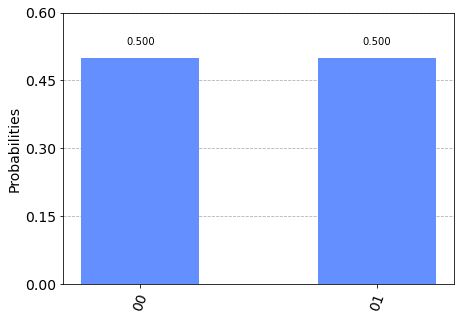

In [18]:
plot_histogram(simulator.run(qobj).result().get_counts())

What would happen to the control qubit (q0) if the target qubit (q1) was in the state |1⟩, and the circuit used a controlled-Sdg gate instead of the controlled-T (as shown in the circuit below)? 

In [22]:
qc_ex6 = QuantumCircuit(2)
qc_ex6.h(0)
qc_ex6.cp(-1*pi/4, 0, 1)
qc_ex6.draw()

qc_ex6.save_statevector()

q_object = assemble(qc_ex6)
final_statevector = simulator.run(q_object).result().get_statevector()

In [23]:
final_statevector

array([0.70710678+0.j, 0.70710678+0.j, 0.        +0.j, 0.        +0.j])

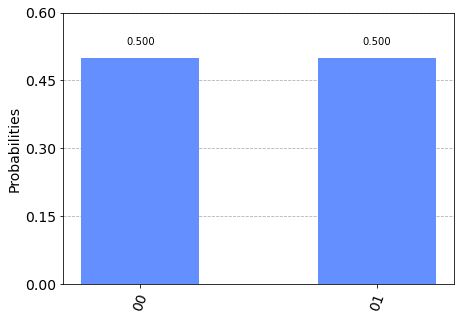

In [24]:
plot_histogram(simulator.run(q_object).result().get_counts())

What would happen to the control qubit (q0) if it was in the state |1⟩ instead of the state |+⟩ before application of the controlled-T (as shown in the circuit below)? 

In [26]:
qc_ex7 = QuantumCircuit(2)
qc_ex7.x(0)
qc_ex7.x(1)
qc_ex7.cp(pi/4, 0, 1)

qc_ex7.save_statevector()
q_obj = assemble(qc_ex7)
final_statevector = simulator.run(q_obj).result().get_statevector()

In [27]:
final_statevector

array([0.        +0.j        , 0.        +0.j        ,
       0.        +0.j        , 0.70710678+0.70710678j])

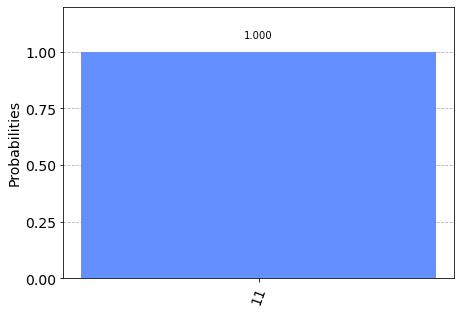

In [28]:
plot_histogram(simulator.run(q_obj).result().get_counts())